In [69]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from PIL import Image
import os

In [70]:
# define the image preprocessing transformation
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.RandomHorizontalFlip(p = 0.5)
])

In [63]:
# get testset
batch_size = 64
testset = torchvision.datasets.ImageFolder("dogbreeds/test", transform = transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

In [64]:
import torch.nn as nn
# set the model architecture
model = torchvision.models.resnet50(pretrained=False)
for param in model.parameters():
    param = param.requires_grad_(False)
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, len(testset.classes)),
    nn.LogSoftmax(dim=1)
)

/Users/chaiharsha/Documents/dog_breed_classifier/dogenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/chaiharsha/Documents/dog_breed_classifier/dogenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [65]:
# add model
state_dict = torch.load("resnetbasemodel.pth")
model.load_state_dict(state_dict)
model.eval() # make sure that the model is set to evaluation mode when the model is loaded

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Accuracy for this batch: 98.44%


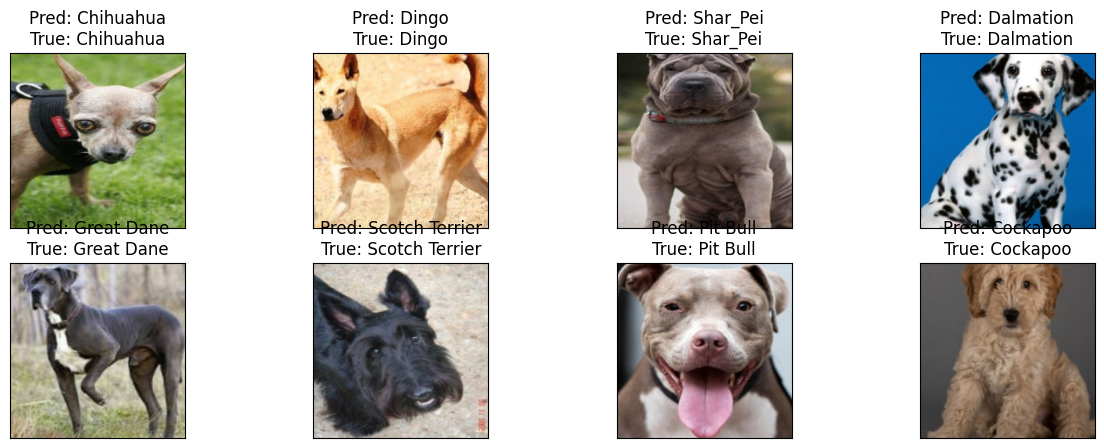

In [67]:
# test data
data_iter = iter(test_loader)
images, labels = next(data_iter)

model.eval()
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# get images with labels and predictions
images = images.numpy()
labels = labels.numpy()
predicted = predicted.numpy()

# print accuracy
correct = (predicted == labels).sum()
batch_accuracy = (correct / len(labels)) * 100
print(f"Accuracy for this batch: {batch_accuracy:.2f}%")

# visualize
fig = plt.figure(figsize=(15, 5))

for i in range(min(len(images), 8)):  # Display up to 8 images
    ax = fig.add_subplot(2 , int(batch_size/16) , i + 1 , xticks = [] , yticks = [])
    ax.imshow(np.transpose(images[i] , (1,2,0)) , cmap = 'gray')
    ax.set_title(testset.classes[labels[i]])
    ax.set_title(f"Pred: {testset.classes[predicted[i]]}\nTrue: {testset.classes[labels[i]]}")

plt.show()


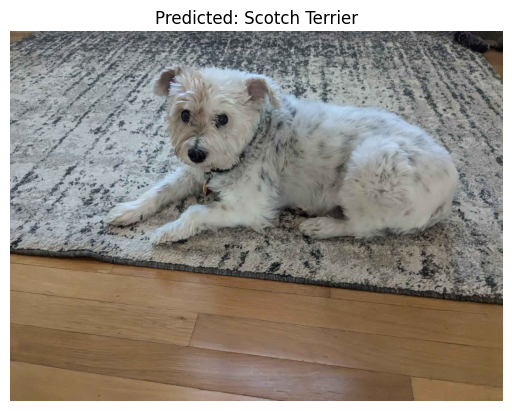

Image: daisy2.jpg | Predicted Class: Scotch Terrier
Probability Distribution:
  Afghan: 0.0000
  African Wild Dog: 0.0000
  Airedale: 0.0000
  American Hairless: 0.0000
  American Spaniel: 0.0000
  Basenji: 0.0000
  Basset: 0.0000
  Beagle: 0.0000
  Bearded Collie: 0.0000
  Bermaise: 0.0000
  Bichon Frise: 0.0000
  Blenheim: 0.0003
  Bloodhound: 0.0000
  Bluetick: 0.0000
  Border Collie: 0.0000
  Borzoi: 0.0000
  Boston Terrier: 0.0000
  Boxer: 0.0000
  Bull Mastiff: 0.0000
  Bull Terrier: 0.0000
  Bulldog: 0.0000
  Cairn: 0.0013
  Chihuahua: 0.0000
  Chinese Crested: 0.0000
  Chow: 0.0000
  Clumber: 0.0000
  Cockapoo: 0.0000
  Cocker: 0.0001
  Collie: 0.0000
  Corgi: 0.0000
  Coyote: 0.0000
  Dalmation: 0.0000
  Dhole: 0.0000
  Dingo: 0.0000
  Doberman: 0.0000
  Elk Hound: 0.0000
  French Bulldog: 0.0000
  German Sheperd: 0.0000
  Golden Retriever: 0.0000
  Great Dane: 0.0000
  Great Perenees: 0.0000
  Greyhound: 0.0000
  Groenendael: 0.0000
  Irish Spaniel: 0.0000
  Irish Wolfhound: 

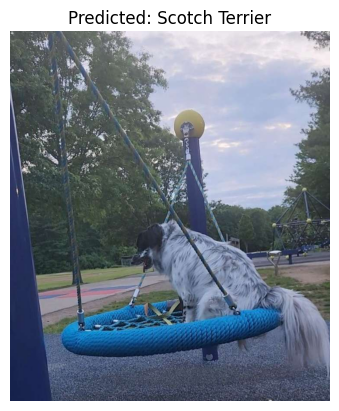

Image: fuji1.png | Predicted Class: Scotch Terrier
Probability Distribution:
  Afghan: 0.0000
  African Wild Dog: 0.0000
  Airedale: 0.0000
  American Hairless: 0.0002
  American Spaniel: 0.0000
  Basenji: 0.0000
  Basset: 0.0000
  Beagle: 0.0000
  Bearded Collie: 0.0000
  Bermaise: 0.0000
  Bichon Frise: 0.0000
  Blenheim: 0.0000
  Bloodhound: 0.0000
  Bluetick: 0.0000
  Border Collie: 0.0000
  Borzoi: 0.0000
  Boston Terrier: 0.0000
  Boxer: 0.0000
  Bull Mastiff: 0.0000
  Bull Terrier: 0.0000
  Bulldog: 0.0000
  Cairn: 0.0000
  Chihuahua: 0.0000
  Chinese Crested: 0.0016
  Chow: 0.0000
  Clumber: 0.0000
  Cockapoo: 0.0000
  Cocker: 0.0000
  Collie: 0.0000
  Corgi: 0.0000
  Coyote: 0.0000
  Dalmation: 0.0000
  Dhole: 0.0000
  Dingo: 0.0000
  Doberman: 0.0000
  Elk Hound: 0.0050
  French Bulldog: 0.0000
  German Sheperd: 0.0000
  Golden Retriever: 0.0000
  Great Dane: 0.0001
  Great Perenees: 0.0000
  Greyhound: 0.0000
  Groenendael: 0.0000
  Irish Spaniel: 0.0000
  Irish Wolfhound: 0

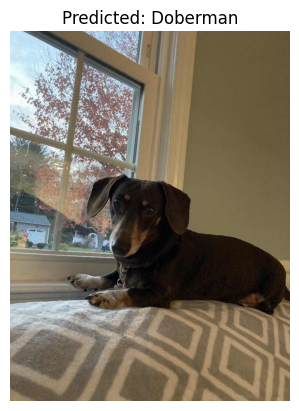

Image: hercules4.jpg | Predicted Class: Doberman
Probability Distribution:
  Afghan: 0.0000
  African Wild Dog: 0.0000
  Airedale: 0.0000
  American Hairless: 0.0000
  American Spaniel: 0.0000
  Basenji: 0.0000
  Basset: 0.0000
  Beagle: 0.0000
  Bearded Collie: 0.0000
  Bermaise: 0.0000
  Bichon Frise: 0.0000
  Blenheim: 0.0000
  Bloodhound: 0.0000
  Bluetick: 0.0042
  Border Collie: 0.0000
  Borzoi: 0.0000
  Boston Terrier: 0.0000
  Boxer: 0.0000
  Bull Mastiff: 0.0000
  Bull Terrier: 0.0000
  Bulldog: 0.0000
  Cairn: 0.0000
  Chihuahua: 0.0000
  Chinese Crested: 0.0000
  Chow: 0.0000
  Clumber: 0.0000
  Cockapoo: 0.0000
  Cocker: 0.0000
  Collie: 0.0000
  Corgi: 0.0000
  Coyote: 0.0000
  Dalmation: 0.0000
  Dhole: 0.0000
  Dingo: 0.0000
  Doberman: 0.9948
  Elk Hound: 0.0000
  French Bulldog: 0.0000
  German Sheperd: 0.0000
  Golden Retriever: 0.0000
  Great Dane: 0.0000
  Great Perenees: 0.0000
  Greyhound: 0.0000
  Groenendael: 0.0000
  Irish Spaniel: 0.0000
  Irish Wolfhound: 0.0

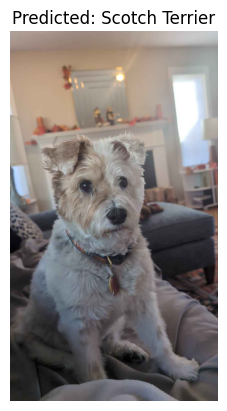

Image: daisy1.jpg | Predicted Class: Scotch Terrier
Probability Distribution:
  Afghan: 0.0000
  African Wild Dog: 0.0000
  Airedale: 0.0000
  American Hairless: 0.0000
  American Spaniel: 0.0000
  Basenji: 0.0000
  Basset: 0.0000
  Beagle: 0.0000
  Bearded Collie: 0.0000
  Bermaise: 0.0000
  Bichon Frise: 0.0000
  Blenheim: 0.0000
  Bloodhound: 0.0000
  Bluetick: 0.0000
  Border Collie: 0.0000
  Borzoi: 0.0000
  Boston Terrier: 0.0000
  Boxer: 0.0000
  Bull Mastiff: 0.0000
  Bull Terrier: 0.0000
  Bulldog: 0.0000
  Cairn: 0.0187
  Chihuahua: 0.0000
  Chinese Crested: 0.0000
  Chow: 0.0000
  Clumber: 0.0000
  Cockapoo: 0.0000
  Cocker: 0.0000
  Collie: 0.0000
  Corgi: 0.0000
  Coyote: 0.0000
  Dalmation: 0.0000
  Dhole: 0.0000
  Dingo: 0.0000
  Doberman: 0.0000
  Elk Hound: 0.0000
  French Bulldog: 0.0000
  German Sheperd: 0.0000
  Golden Retriever: 0.0000
  Great Dane: 0.0000
  Great Perenees: 0.0000
  Greyhound: 0.0000
  Groenendael: 0.0000
  Irish Spaniel: 0.0000
  Irish Wolfhound: 

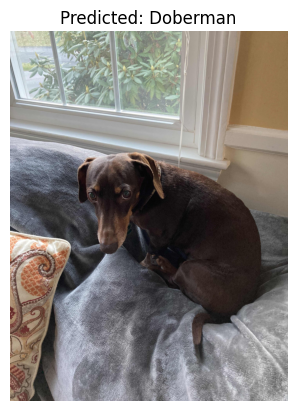

Image: hercules1.jpg | Predicted Class: Doberman
Probability Distribution:
  Afghan: 0.0000
  African Wild Dog: 0.0000
  Airedale: 0.0000
  American Hairless: 0.0000
  American Spaniel: 0.0000
  Basenji: 0.0000
  Basset: 0.0000
  Beagle: 0.0000
  Bearded Collie: 0.0000
  Bermaise: 0.0000
  Bichon Frise: 0.0000
  Blenheim: 0.0000
  Bloodhound: 0.0000
  Bluetick: 0.0000
  Border Collie: 0.0000
  Borzoi: 0.0000
  Boston Terrier: 0.0000
  Boxer: 0.0000
  Bull Mastiff: 0.0000
  Bull Terrier: 0.0000
  Bulldog: 0.0000
  Cairn: 0.0000
  Chihuahua: 0.0000
  Chinese Crested: 0.0000
  Chow: 0.0000
  Clumber: 0.0000
  Cockapoo: 0.0000
  Cocker: 0.0000
  Collie: 0.0000
  Corgi: 0.0000
  Coyote: 0.0000
  Dalmation: 0.0000
  Dhole: 0.0000
  Dingo: 0.0000
  Doberman: 0.9977
  Elk Hound: 0.0000
  French Bulldog: 0.0000
  German Sheperd: 0.0000
  Golden Retriever: 0.0000
  Great Dane: 0.0000
  Great Perenees: 0.0000
  Greyhound: 0.0000
  Groenendael: 0.0000
  Irish Spaniel: 0.0000
  Irish Wolfhound: 0.0

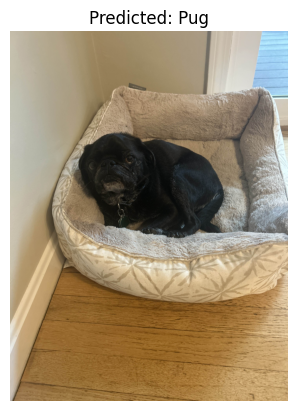

Image: fudge.jpg | Predicted Class: Pug
Probability Distribution:
  Afghan: 0.0000
  African Wild Dog: 0.0000
  Airedale: 0.0000
  American Hairless: 0.0000
  American Spaniel: 0.0000
  Basenji: 0.0000
  Basset: 0.0000
  Beagle: 0.0000
  Bearded Collie: 0.0000
  Bermaise: 0.0000
  Bichon Frise: 0.0000
  Blenheim: 0.0000
  Bloodhound: 0.0000
  Bluetick: 0.0000
  Border Collie: 0.0000
  Borzoi: 0.0000
  Boston Terrier: 0.0000
  Boxer: 0.0000
  Bull Mastiff: 0.0002
  Bull Terrier: 0.0000
  Bulldog: 0.0186
  Cairn: 0.0000
  Chihuahua: 0.0000
  Chinese Crested: 0.0000
  Chow: 0.0000
  Clumber: 0.0000
  Cockapoo: 0.0000
  Cocker: 0.0000
  Collie: 0.0000
  Corgi: 0.0000
  Coyote: 0.0000
  Dalmation: 0.0000
  Dhole: 0.0000
  Dingo: 0.0000
  Doberman: 0.0000
  Elk Hound: 0.0000
  French Bulldog: 0.0000
  German Sheperd: 0.0000
  Golden Retriever: 0.0000
  Great Dane: 0.0000
  Great Perenees: 0.0000
  Greyhound: 0.0000
  Groenendael: 0.0000
  Irish Spaniel: 0.0000
  Irish Wolfhound: 0.0000
  Jap

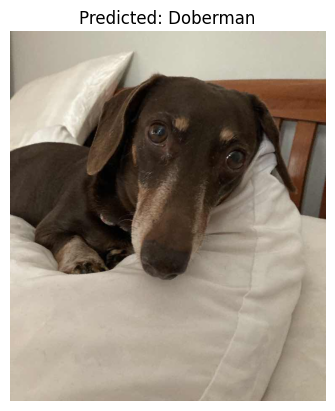

Image: hercules2.jpg | Predicted Class: Doberman
Probability Distribution:
  Afghan: 0.0000
  African Wild Dog: 0.0000
  Airedale: 0.0000
  American Hairless: 0.0002
  American Spaniel: 0.0000
  Basenji: 0.0000
  Basset: 0.0001
  Beagle: 0.1970
  Bearded Collie: 0.0000
  Bermaise: 0.0000
  Bichon Frise: 0.0000
  Blenheim: 0.0000
  Bloodhound: 0.0000
  Bluetick: 0.0474
  Border Collie: 0.0000
  Borzoi: 0.0000
  Boston Terrier: 0.0000
  Boxer: 0.0000
  Bull Mastiff: 0.0000
  Bull Terrier: 0.0000
  Bulldog: 0.0000
  Cairn: 0.0000
  Chihuahua: 0.0000
  Chinese Crested: 0.0000
  Chow: 0.0000
  Clumber: 0.0000
  Cockapoo: 0.0000
  Cocker: 0.0000
  Collie: 0.0000
  Corgi: 0.0000
  Coyote: 0.0000
  Dalmation: 0.0000
  Dhole: 0.0000
  Dingo: 0.0000
  Doberman: 0.6480
  Elk Hound: 0.0000
  French Bulldog: 0.0000
  German Sheperd: 0.0000
  Golden Retriever: 0.0000
  Great Dane: 0.0001
  Great Perenees: 0.0000
  Greyhound: 0.0720
  Groenendael: 0.0000
  Irish Spaniel: 0.0000
  Irish Wolfhound: 0.0

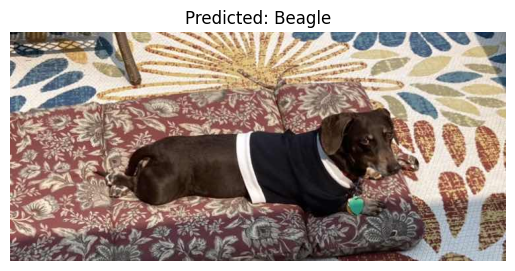

Image: hercules3.jpg | Predicted Class: Beagle
Probability Distribution:
  Afghan: 0.0000
  African Wild Dog: 0.0000
  Airedale: 0.0000
  American Hairless: 0.0009
  American Spaniel: 0.0000
  Basenji: 0.0000
  Basset: 0.0001
  Beagle: 0.3347
  Bearded Collie: 0.0000
  Bermaise: 0.0000
  Bichon Frise: 0.0000
  Blenheim: 0.0000
  Bloodhound: 0.0063
  Bluetick: 0.0008
  Border Collie: 0.0000
  Borzoi: 0.0000
  Boston Terrier: 0.0000
  Boxer: 0.0000
  Bull Mastiff: 0.0000
  Bull Terrier: 0.0000
  Bulldog: 0.0004
  Cairn: 0.0002
  Chihuahua: 0.0010
  Chinese Crested: 0.0002
  Chow: 0.0000
  Clumber: 0.0000
  Cockapoo: 0.0000
  Cocker: 0.0000
  Collie: 0.0000
  Corgi: 0.0000
  Coyote: 0.0000
  Dalmation: 0.0000
  Dhole: 0.0000
  Dingo: 0.0009
  Doberman: 0.0252
  Elk Hound: 0.0011
  French Bulldog: 0.0000
  German Sheperd: 0.2134
  Golden Retriever: 0.0000
  Great Dane: 0.0003
  Great Perenees: 0.0000
  Greyhound: 0.0494
  Groenendael: 0.0000
  Irish Spaniel: 0.0002
  Irish Wolfhound: 0.000

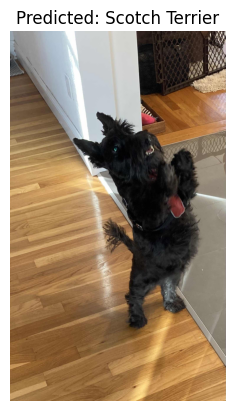

Image: kiltyrose.jpg | Predicted Class: Scotch Terrier
Probability Distribution:
  Afghan: 0.0000
  African Wild Dog: 0.0000
  Airedale: 0.0000
  American Hairless: 0.0000
  American Spaniel: 0.0000
  Basenji: 0.0000
  Basset: 0.0000
  Beagle: 0.0000
  Bearded Collie: 0.0000
  Bermaise: 0.0000
  Bichon Frise: 0.0000
  Blenheim: 0.0000
  Bloodhound: 0.0000
  Bluetick: 0.0000
  Border Collie: 0.0000
  Borzoi: 0.0000
  Boston Terrier: 0.0000
  Boxer: 0.0000
  Bull Mastiff: 0.0000
  Bull Terrier: 0.0000
  Bulldog: 0.0000
  Cairn: 0.0000
  Chihuahua: 0.0000
  Chinese Crested: 0.0000
  Chow: 0.0000
  Clumber: 0.0000
  Cockapoo: 0.0000
  Cocker: 0.0307
  Collie: 0.0000
  Corgi: 0.0000
  Coyote: 0.0000
  Dalmation: 0.0000
  Dhole: 0.0000
  Dingo: 0.0000
  Doberman: 0.0000
  Elk Hound: 0.0000
  French Bulldog: 0.0000
  German Sheperd: 0.0000
  Golden Retriever: 0.0000
  Great Dane: 0.0000
  Great Perenees: 0.0000
  Greyhound: 0.0000
  Groenendael: 0.0000
  Irish Spaniel: 0.0000
  Irish Wolfhoun

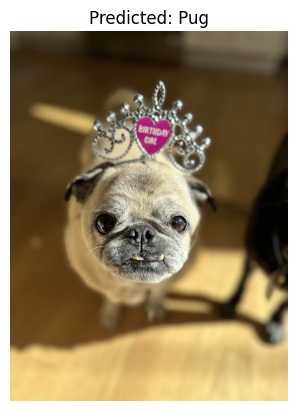

Image: izzy1.jpg | Predicted Class: Pug
Probability Distribution:
  Afghan: 0.0000
  African Wild Dog: 0.0000
  Airedale: 0.0000
  American Hairless: 0.0000
  American Spaniel: 0.0000
  Basenji: 0.0000
  Basset: 0.0000
  Beagle: 0.0000
  Bearded Collie: 0.0000
  Bermaise: 0.0000
  Bichon Frise: 0.0000
  Blenheim: 0.0000
  Bloodhound: 0.0000
  Bluetick: 0.0000
  Border Collie: 0.0000
  Borzoi: 0.0000
  Boston Terrier: 0.0000
  Boxer: 0.0000
  Bull Mastiff: 0.0000
  Bull Terrier: 0.0000
  Bulldog: 0.0026
  Cairn: 0.0000
  Chihuahua: 0.0000
  Chinese Crested: 0.0000
  Chow: 0.0000
  Clumber: 0.0000
  Cockapoo: 0.0000
  Cocker: 0.0000
  Collie: 0.0000
  Corgi: 0.0000
  Coyote: 0.0000
  Dalmation: 0.0000
  Dhole: 0.0000
  Dingo: 0.0000
  Doberman: 0.0000
  Elk Hound: 0.0000
  French Bulldog: 0.0000
  German Sheperd: 0.0000
  Golden Retriever: 0.0000
  Great Dane: 0.0000
  Great Perenees: 0.0000
  Greyhound: 0.0000
  Groenendael: 0.0000
  Irish Spaniel: 0.0000
  Irish Wolfhound: 0.0000
  Jap

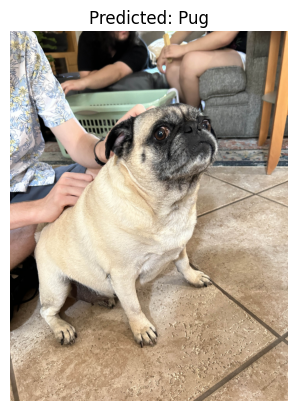

Image: piper1.jpg | Predicted Class: Pug
Probability Distribution:
  Afghan: 0.0000
  African Wild Dog: 0.0000
  Airedale: 0.0000
  American Hairless: 0.0000
  American Spaniel: 0.0000
  Basenji: 0.0000
  Basset: 0.0000
  Beagle: 0.0000
  Bearded Collie: 0.0000
  Bermaise: 0.0000
  Bichon Frise: 0.0000
  Blenheim: 0.0000
  Bloodhound: 0.0000
  Bluetick: 0.0000
  Border Collie: 0.0000
  Borzoi: 0.0000
  Boston Terrier: 0.0000
  Boxer: 0.0000
  Bull Mastiff: 0.0000
  Bull Terrier: 0.0000
  Bulldog: 0.0000
  Cairn: 0.0000
  Chihuahua: 0.0000
  Chinese Crested: 0.0000
  Chow: 0.0000
  Clumber: 0.0000
  Cockapoo: 0.0000
  Cocker: 0.0000
  Collie: 0.0000
  Corgi: 0.0000
  Coyote: 0.0000
  Dalmation: 0.0000
  Dhole: 0.0000
  Dingo: 0.0000
  Doberman: 0.0000
  Elk Hound: 0.0021
  French Bulldog: 0.0000
  German Sheperd: 0.0000
  Golden Retriever: 0.0000
  Great Dane: 0.0000
  Great Perenees: 0.0000
  Greyhound: 0.0000
  Groenendael: 0.0000
  Irish Spaniel: 0.0000
  Irish Wolfhound: 0.0000
  Ja

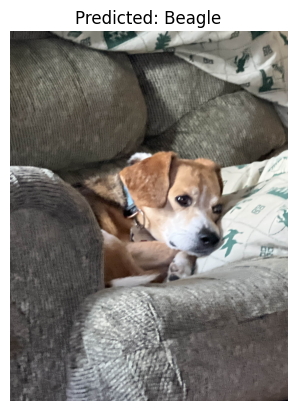

Image: andy1.jpg | Predicted Class: Beagle
Probability Distribution:
  Afghan: 0.0000
  African Wild Dog: 0.0000
  Airedale: 0.0000
  American Hairless: 0.0000
  American Spaniel: 0.0000
  Basenji: 0.0000
  Basset: 0.0000
  Beagle: 1.0000
  Bearded Collie: 0.0000
  Bermaise: 0.0000
  Bichon Frise: 0.0000
  Blenheim: 0.0000
  Bloodhound: 0.0000
  Bluetick: 0.0000
  Border Collie: 0.0000
  Borzoi: 0.0000
  Boston Terrier: 0.0000
  Boxer: 0.0000
  Bull Mastiff: 0.0000
  Bull Terrier: 0.0000
  Bulldog: 0.0000
  Cairn: 0.0000
  Chihuahua: 0.0000
  Chinese Crested: 0.0000
  Chow: 0.0000
  Clumber: 0.0000
  Cockapoo: 0.0000
  Cocker: 0.0000
  Collie: 0.0000
  Corgi: 0.0000
  Coyote: 0.0000
  Dalmation: 0.0000
  Dhole: 0.0000
  Dingo: 0.0000
  Doberman: 0.0000
  Elk Hound: 0.0000
  French Bulldog: 0.0000
  German Sheperd: 0.0000
  Golden Retriever: 0.0000
  Great Dane: 0.0000
  Great Perenees: 0.0000
  Greyhound: 0.0000
  Groenendael: 0.0000
  Irish Spaniel: 0.0000
  Irish Wolfhound: 0.0000
  

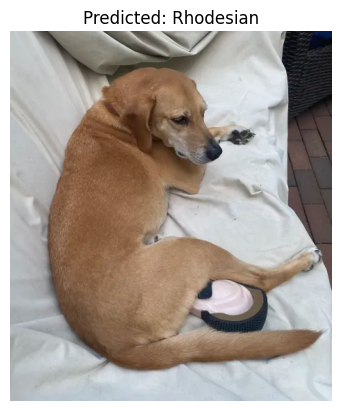

Image: tucker1.png | Predicted Class: Rhodesian
Probability Distribution:
  Afghan: 0.0000
  African Wild Dog: 0.0000
  Airedale: 0.0000
  American Hairless: 0.0000
  American Spaniel: 0.0000
  Basenji: 0.0000
  Basset: 0.0000
  Beagle: 0.0125
  Bearded Collie: 0.0000
  Bermaise: 0.0000
  Bichon Frise: 0.0000
  Blenheim: 0.0000
  Bloodhound: 0.2831
  Bluetick: 0.0000
  Border Collie: 0.0000
  Borzoi: 0.0000
  Boston Terrier: 0.0000
  Boxer: 0.0000
  Bull Mastiff: 0.0000
  Bull Terrier: 0.0000
  Bulldog: 0.0000
  Cairn: 0.0000
  Chihuahua: 0.0000
  Chinese Crested: 0.0000
  Chow: 0.0000
  Clumber: 0.0000
  Cockapoo: 0.0000
  Cocker: 0.0000
  Collie: 0.0000
  Corgi: 0.0000
  Coyote: 0.0000
  Dalmation: 0.0000
  Dhole: 0.0000
  Dingo: 0.0000
  Doberman: 0.0000
  Elk Hound: 0.0000
  French Bulldog: 0.0000
  German Sheperd: 0.0000
  Golden Retriever: 0.0002
  Great Dane: 0.0000
  Great Perenees: 0.0000
  Greyhound: 0.0007
  Groenendael: 0.0000
  Irish Spaniel: 0.0000
  Irish Wolfhound: 0.00

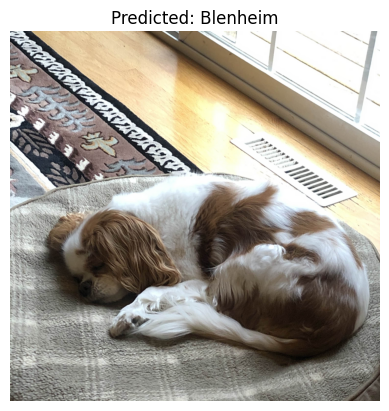

Image: cassie2.jpg | Predicted Class: Blenheim
Probability Distribution:
  Afghan: 0.0000
  African Wild Dog: 0.0000
  Airedale: 0.0000
  American Hairless: 0.0000
  American Spaniel: 0.0000
  Basenji: 0.0000
  Basset: 0.0000
  Beagle: 0.0000
  Bearded Collie: 0.0000
  Bermaise: 0.0000
  Bichon Frise: 0.0000
  Blenheim: 0.9997
  Bloodhound: 0.0000
  Bluetick: 0.0000
  Border Collie: 0.0000
  Borzoi: 0.0000
  Boston Terrier: 0.0000
  Boxer: 0.0000
  Bull Mastiff: 0.0000
  Bull Terrier: 0.0000
  Bulldog: 0.0000
  Cairn: 0.0000
  Chihuahua: 0.0000
  Chinese Crested: 0.0000
  Chow: 0.0000
  Clumber: 0.0000
  Cockapoo: 0.0000
  Cocker: 0.0000
  Collie: 0.0000
  Corgi: 0.0000
  Coyote: 0.0000
  Dalmation: 0.0000
  Dhole: 0.0000
  Dingo: 0.0000
  Doberman: 0.0000
  Elk Hound: 0.0000
  French Bulldog: 0.0000
  German Sheperd: 0.0000
  Golden Retriever: 0.0000
  Great Dane: 0.0000
  Great Perenees: 0.0000
  Greyhound: 0.0000
  Groenendael: 0.0000
  Irish Spaniel: 0.0000
  Irish Wolfhound: 0.000

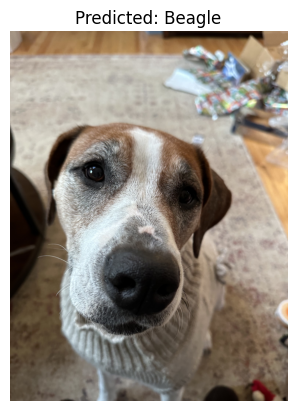

Image: casey1.jpg | Predicted Class: Beagle
Probability Distribution:
  Afghan: 0.0000
  African Wild Dog: 0.0000
  Airedale: 0.0000
  American Hairless: 0.0000
  American Spaniel: 0.0000
  Basenji: 0.0000
  Basset: 0.0000
  Beagle: 0.9534
  Bearded Collie: 0.0000
  Bermaise: 0.0000
  Bichon Frise: 0.0000
  Blenheim: 0.0000
  Bloodhound: 0.0000
  Bluetick: 0.0000
  Border Collie: 0.0000
  Borzoi: 0.0000
  Boston Terrier: 0.0000
  Boxer: 0.0039
  Bull Mastiff: 0.0002
  Bull Terrier: 0.0000
  Bulldog: 0.0000
  Cairn: 0.0000
  Chihuahua: 0.0000
  Chinese Crested: 0.0000
  Chow: 0.0000
  Clumber: 0.0000
  Cockapoo: 0.0000
  Cocker: 0.0000
  Collie: 0.0000
  Corgi: 0.0000
  Coyote: 0.0000
  Dalmation: 0.0000
  Dhole: 0.0000
  Dingo: 0.0000
  Doberman: 0.0000
  Elk Hound: 0.0000
  French Bulldog: 0.0000
  German Sheperd: 0.0000
  Golden Retriever: 0.0000
  Great Dane: 0.0004
  Great Perenees: 0.0000
  Greyhound: 0.0000
  Groenendael: 0.0000
  Irish Spaniel: 0.0000
  Irish Wolfhound: 0.0000
 

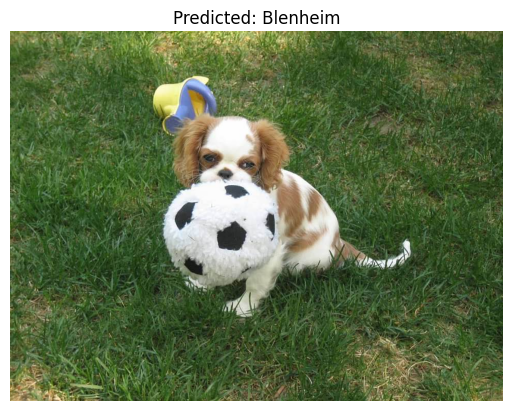

Image: cassie.jpg | Predicted Class: Blenheim
Probability Distribution:
  Afghan: 0.0000
  African Wild Dog: 0.0000
  Airedale: 0.0000
  American Hairless: 0.0000
  American Spaniel: 0.0000
  Basenji: 0.0000
  Basset: 0.0000
  Beagle: 0.0000
  Bearded Collie: 0.0000
  Bermaise: 0.0003
  Bichon Frise: 0.0000
  Blenheim: 0.9986
  Bloodhound: 0.0000
  Bluetick: 0.0000
  Border Collie: 0.0000
  Borzoi: 0.0000
  Boston Terrier: 0.0001
  Boxer: 0.0000
  Bull Mastiff: 0.0000
  Bull Terrier: 0.0000
  Bulldog: 0.0000
  Cairn: 0.0000
  Chihuahua: 0.0000
  Chinese Crested: 0.0000
  Chow: 0.0000
  Clumber: 0.0000
  Cockapoo: 0.0000
  Cocker: 0.0000
  Collie: 0.0000
  Corgi: 0.0000
  Coyote: 0.0000
  Dalmation: 0.0000
  Dhole: 0.0000
  Dingo: 0.0000
  Doberman: 0.0000
  Elk Hound: 0.0000
  French Bulldog: 0.0000
  German Sheperd: 0.0000
  Golden Retriever: 0.0000
  Great Dane: 0.0000
  Great Perenees: 0.0000
  Greyhound: 0.0000
  Groenendael: 0.0000
  Irish Spaniel: 0.0000
  Irish Wolfhound: 0.0000

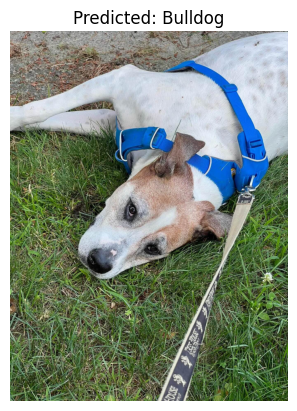

Image: casey2.jpg | Predicted Class: Bulldog
Probability Distribution:
  Afghan: 0.0000
  African Wild Dog: 0.0000
  Airedale: 0.0000
  American Hairless: 0.0000
  American Spaniel: 0.0000
  Basenji: 0.0000
  Basset: 0.0000
  Beagle: 0.0000
  Bearded Collie: 0.0000
  Bermaise: 0.0000
  Bichon Frise: 0.0000
  Blenheim: 0.0000
  Bloodhound: 0.0000
  Bluetick: 0.0000
  Border Collie: 0.0001
  Borzoi: 0.0002
  Boston Terrier: 0.0183
  Boxer: 0.0000
  Bull Mastiff: 0.0001
  Bull Terrier: 0.0149
  Bulldog: 0.4854
  Cairn: 0.0000
  Chihuahua: 0.0072
  Chinese Crested: 0.0000
  Chow: 0.0000
  Clumber: 0.0000
  Cockapoo: 0.0000
  Cocker: 0.0009
  Collie: 0.0000
  Corgi: 0.1891
  Coyote: 0.0000
  Dalmation: 0.0000
  Dhole: 0.0000
  Dingo: 0.0001
  Doberman: 0.0000
  Elk Hound: 0.0000
  French Bulldog: 0.0000
  German Sheperd: 0.0000
  Golden Retriever: 0.0000
  Great Dane: 0.0000
  Great Perenees: 0.0000
  Greyhound: 0.2828
  Groenendael: 0.0000
  Irish Spaniel: 0.0000
  Irish Wolfhound: 0.0000


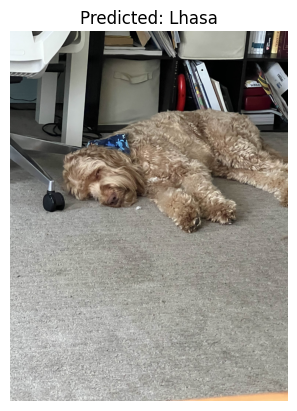

Image: oso.jpg | Predicted Class: Lhasa
Probability Distribution:
  Afghan: 0.0000
  African Wild Dog: 0.0000
  Airedale: 0.0000
  American Hairless: 0.0000
  American Spaniel: 0.0000
  Basenji: 0.0000
  Basset: 0.0000
  Beagle: 0.0000
  Bearded Collie: 0.0000
  Bermaise: 0.0000
  Bichon Frise: 0.0000
  Blenheim: 0.0015
  Bloodhound: 0.0000
  Bluetick: 0.0000
  Border Collie: 0.0000
  Borzoi: 0.0000
  Boston Terrier: 0.0000
  Boxer: 0.0000
  Bull Mastiff: 0.0000
  Bull Terrier: 0.0000
  Bulldog: 0.0001
  Cairn: 0.0001
  Chihuahua: 0.0000
  Chinese Crested: 0.0000
  Chow: 0.0000
  Clumber: 0.0000
  Cockapoo: 0.0179
  Cocker: 0.2328
  Collie: 0.0000
  Corgi: 0.0000
  Coyote: 0.0000
  Dalmation: 0.0000
  Dhole: 0.0000
  Dingo: 0.0000
  Doberman: 0.0000
  Elk Hound: 0.0000
  French Bulldog: 0.0000
  German Sheperd: 0.0000
  Golden Retriever: 0.0000
  Great Dane: 0.0000
  Great Perenees: 0.0000
  Greyhound: 0.0000
  Groenendael: 0.0000
  Irish Spaniel: 0.0000
  Irish Wolfhound: 0.0000
  Jap

In [93]:
# adding our own images!!
for image_name in os.listdir("addeddogs"):
    if not (image_name.endswith(".jpg") or image_name.endswith(".png")):
        continue

    image_path = os.path.join("addeddogs", image_name)
    image = Image.open(image_path).convert("RGB")
    input_image = transform(image).unsqueeze(0)  # Add batch dimension

    with torch.no_grad():
        output = model(input_image)
        probabilities = torch.exp(output)
        _, predicted = torch.max(output, 1)
    
    predicted_class = testset.classes[predicted.item()]

    plt.imshow(image)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()

    print(f"Image: {image_name} | Predicted Class: {predicted_class}")
    print("Probability Distribution:")
    for i, prob in enumerate(probabilities.squeeze().tolist()):
        print(f"  {testset.classes[i]}: {prob:.4f}")

    print("\n" + "-"*40 + "\n")